# Acommodations

Responses here do not lend themselves easily to plots for two reasons. First, most people do not need accomodations, but for those that do need it, they have very specific requirements.

In [1]:
from config import survey, plot_wordcloud, make_wordcloud
import altair as alt

First, when asked how much of an issue accomodation might be in preventing attendance, the response was very low. The numbers in these plots can be interpreted as:

* 1 - Likely will prevent me from attending
* 2 - Might prevent me from attending
* 3 - Could attend, but might limit participation
* 4 - Not a concern
* 5 - Unknown

In [2]:
charts = [
    {
        'name': "COVID",
        'col': "worried_covid"
    },
    {
        'name': "Funding",
        'col': "worried_funding"
    },
    {
        'name': "Length",
        'col': "worried_length"
    },
    {
        'name': "Accessability",
        'col': "worried_accessibility"
    },
    {
        'name': "Responsibilities",
        'col': "worried_responsibilities"
    },
]

c_list = [
    (alt.Chart(data=survey, title=c_info['name'])
    .mark_bar()
    .encode(
        x=alt.X(shorthand=f"{c_info['col']}:N", title="", axis=alt.Axis()),
        y=alt.Y(shorthand="count()",title="Number of people", scale=alt.Scale(domain=(0, 650))),
        tooltip=alt.Tooltip("count():N"),
    )
    )
    for c_info in charts
]

r = None
for c in c_list:
    if r is None:
        r = c
    else:
        r = r | c

r

alt.HConcatChart(...)

## Hearing

This is a general question on hearing accomodations. Multiple answers were allowed, as can be seen, as were other things to be filled in.

In [3]:
survey['acc_hearing'].value_counts().rename_axis('unique_values').to_frame('counts')

,counts
unique_values,
"Live captioning would be helpful, but not necessary for me",58
"Live captioning would be helpful, but not necessary for me, Post-factor transcription with 12-hour turnaround time would be valuable",15
Post-factor transcription with 12-hour turnaround time would be valuable,10
Live captioning is necessary for my full participation,6
"Live captioning would be helpful, but not necessary for me, Assistive listening or amplification service would be helpful",3
Assistive listening or amplification service would be helpful,2
"ASL interpretation is necessary for my full participation if sessions are not live-captioned, Live captioning is necessary for my full participation",2
"Live captioning is necessary for my full participation, Post-factor transcription with 12-hour turnaround time would be valuable",2
"Live captioning is necessary for my full participation, Live captioning would be helpful, but not necessary for me",2


We can try to plot this, but unfortunately the way google stores survey results means it is impossible to tell the difference between a comma-separated answer and two answers, also separated by a comma (hence the top two entries being exactly the same)

In [2]:
(alt.Chart(data=survey, title="Hearing Related Accomodation Requests")
    .mark_bar()
    .transform_flatten(
        flatten=['acc_hearing_ar'],
    )
    .encode(
        y=alt.Y(shorthand="acc_hearing_ar:N", sort="-x"),
        x=alt.X(shorthand="count()",title="Number of responses"),
        tooltip=alt.Tooltip("count():N"),
    )
)

alt.Chart(...)

In [6]:
survey['acc_other'].value_counts().rename_axis('unique_values').to_frame('counts')

,counts
unique_values,
"A ""Quiet Zone"" near the meeting rooms where people can go to rest without interaction",66
"Seating available at all events, breaks, meals, discussion areas, A ""Quiet Zone"" near the meeting rooms where people can go to rest without interaction",25
"Seating available at all events, breaks, meals, discussion areas",20
Use of colorblindness-friendly color schemes in presentations,13
"Seating available at all events, breaks, meals, discussion areas, Assistance in traveling around campus, A ""Quiet Zone"" near the meeting rooms where people can go to rest without interaction",7
"Use of colorblindness-friendly color schemes in presentations, Seating available at all events, breaks, meals, discussion areas",5
"Seating available at all events, breaks, meals, discussion areas, Assistance in traveling around campus",4
"Use of colorblindness-friendly color schemes in presentations, A ""Quiet Zone"" near the meeting rooms where people can go to rest without interaction",4
Assistance in traveling around campus,3


In [3]:
(alt.Chart(data=survey, title="Other Related Accomodation Requests")
    .mark_bar()
    .transform_flatten(
        flatten=['acc_other_ar'],
    )
    .encode(
        y=alt.Y(shorthand="acc_other_ar:N", sort="-x"),
        x=alt.X(shorthand="count()",title="Number of responses"),
        tooltip=alt.Tooltip("count():N"),
    )
)

alt.Chart(...)

In [4]:
def included_other(name: str) -> int:
    h_ar = survey['acc_other_ar'].apply(lambda v: name in v)
    return int(h_ar.sum())

print("Colorblindness-Friendly Color Schemes: " + str(included_other("Use of colorblindness-friendly color schemes in presentations")))
print("Image alt-text: " + str(included_other("Alt-text describing images in presentations")))
print("Seating Availible Everywhere: " + str(included_other("Seating available at all events")))
print("Specific Furniture: " + str(included_other("Specific furniture")))
print("Assistance moving around campus: " + str(included_other("Assistance in traveling around campus")))
print("Quiet Zone: " + str(included_other("A \"Quiet Zone\" near the meeting rooms where people can go to rest without interaction")))

Colorblindness-Friendly Color Schemes: 25
Image alt-text: 7
Seating Availible Everywhere: 69
Specific Furniture: 3
Assistance moving around campus: 9
Quiet Zone: 68


## Comments

We also asked for comments. Not a lot of people left comments, so pulling themes out is circumspect.

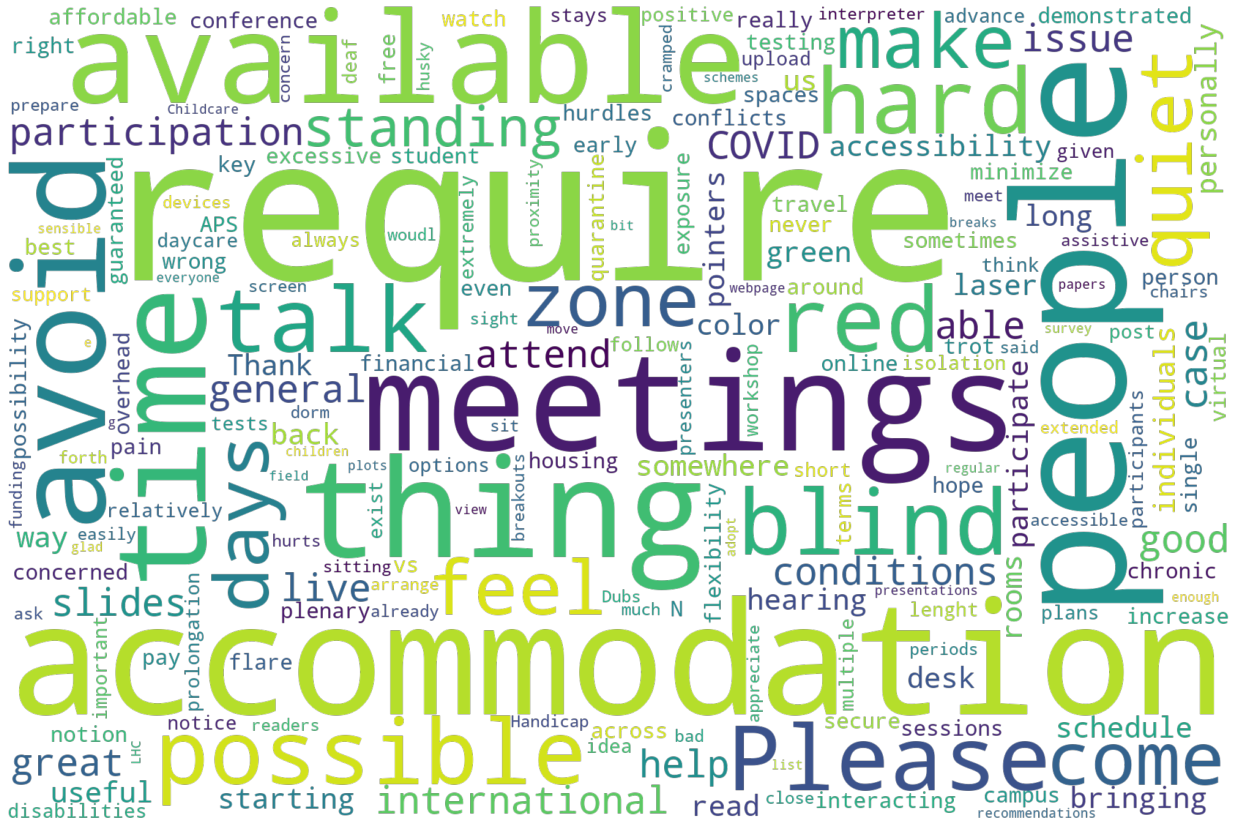

In [8]:
plot_wordcloud(make_wordcloud(survey['acc_comments'], ['meeting', 'need']))

Some comments from scanning the responses. As can be seen not a lot of words really stuck out here. Of the 730 people that responded, 30 left comments here.

* Severl comments on the idea of a quiet zone
* Making sure there is lots of time to just talk with each other
* Several comments on not being able to sit for long periods of time
* Remote or virutal attendance as an accomodation